In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist --file fashion-mnist_train.csv


Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 57% 19.0M/33.6M [00:00<00:00, 119MB/s]
100% 33.6M/33.6M [00:00<00:00, 147MB/s]


In [ ]:
!unzip fashion-mnist_train.csv.zip


Archive:  fashion-mnist_train.csv.zip
  inflating: fashion-mnist_train.csv  


In [ ]:
data = pd.read_csv('fashion-mnist_train.csv',nrows=6000)

In [ ]:
data


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,0,0,0,0,0,0,0,0,0,...,82,0,0,0,0,0,0,0,0,0
5997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


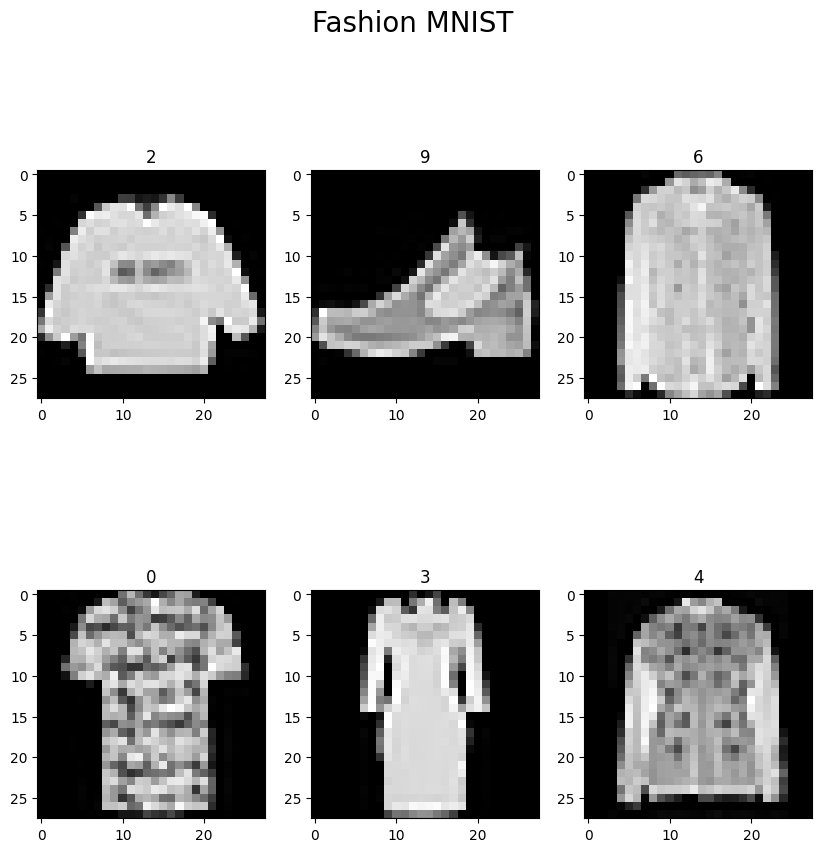

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10))
fig.suptitle('Fashion MNIST',fontsize=20)
for i,ax in enumerate(axes.flat):
    ax.imshow(data.iloc[i,1:].values.reshape(28,28),cmap='gray')
    ax.set_title(data.iloc[i,0])
plt.show()

In [ ]:
X=data.drop('label',axis=1)
y=data['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train=X_train/255
X_test=X_test/255


In [ ]:
#create customdataset class
class CustomDataset(Dataset):
  def __init__(self,x,y):
    self.x=torch.tensor(x.values,dtype=torch.float32)
    self.y=torch.tensor(y.values,dtype=torch.long)
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]


In [ ]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1882, 0.0941, 0.0000, 0.0000, 0.0431, 0.0039, 0.2549,
         0.0549, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0392, 0.1608, 0.6431, 0.3451, 0.4667, 0.6902, 0.7255, 0.6588, 0.5882,
         0.3765, 0.4431, 0.5216, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1922,
         0.4039, 0.6471, 0.2275, 0.0118, 0.5373, 0.5216, 0.3647, 0.5176, 0.4824,
         0.2196, 0.7216, 0.1412, 0.0000, 0.5333, 0.6667, 0.1569, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510,
         0.5569, 0.3451, 0.4431, 0.6314, 0.2588, 0.6588, 0.6078, 0.2235, 0.4000,
         0.6549, 0.0353, 0.4863, 0.5647, 0.0431, 0.4706, 0.4078, 0.5686, 0.1647,
         0.0000, 0.0000, 0.0

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

In [ ]:
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
epochs=100
learning_rate=0.1


In [ ]:
model=MyNN(X_train.shape[1])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
for epoch in range(epochs):
  total_epoch_loss=0
  for i,(x,y) in enumerate(train_loader):
    optimizer.zero_grad()
    y_pred=model(x)
    loss=criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    total_epoch_loss+=loss.item()
  print(f'Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}')

Epoch 1/100, Loss: 0.04532594277213017
Epoch 2/100, Loss: 0.04222695365548134
Epoch 3/100, Loss: 0.07143054869025946
Epoch 4/100, Loss: 0.037215456254780295
Epoch 5/100, Loss: 0.024974654869486888
Epoch 6/100, Loss: 0.027719938258330027
Epoch 7/100, Loss: 0.0262249529051284
Epoch 8/100, Loss: 0.038687861093009514
Epoch 9/100, Loss: 0.027583767405400673
Epoch 10/100, Loss: 0.018941578281422455
Epoch 11/100, Loss: 0.060910788495093585
Epoch 12/100, Loss: 0.043614802143226064
Epoch 13/100, Loss: 0.022825163795302313
Epoch 14/100, Loss: 0.016802644891043505
Epoch 15/100, Loss: 0.025815056208521127
Epoch 16/100, Loss: 0.01327655549471577
Epoch 17/100, Loss: 0.012048359488447508
Epoch 18/100, Loss: 0.011261394014582038
Epoch 19/100, Loss: 0.08897646193082134
Epoch 20/100, Loss: 0.03312505209818482
Epoch 21/100, Loss: 0.01888546137139201
Epoch 22/100, Loss: 0.015491453586146236
Epoch 23/100, Loss: 0.018289682986214757
Epoch 24/100, Loss: 0.009343981572116414
Epoch 25/100, Loss: 0.009408778483

In [ ]:
total=0
correct=0
with torch.no_grad():
  for x,y in test_loader:
    y_pred=model(x)
    _,predicted=torch.max(y_pred,1)
    total+=y.size(0)
    correct+=(predicted==y).sum().item()
print(f'Accuracy: {100*correct/total}')



Accuracy: 86.33333333333333
